<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [2]:
train_dir = 'F:/EE596/HW2/dogs-vs-cats/train/train/'
test_dir = 'F:/EE596/HW2/dogs-vs-cats/test1/test1/'

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [3]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    if 'cat' in img:
        return [1, 0]
    elif 'dog' in img:
        return [0, 1]
    else:
        print('Error classifying img')

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [4]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data():
    data_labels = []
    for img in tqdm(os.listdir(train_dir)):
        path = train_dir + str(img)
        label = label_img(img)
        data = cv2.resize(cv2.imread(path), (227, 227))
        data_labels.append((data, label))
    shuffle(data_labels)
    return data_labels
    

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [5]:
def create_test_data():
    test_data = []
    for img in tqdm(os.listdir(test_dir)):
        path = test_dir + str(img)
        data = cv2.resize(cv2.imread(path), (227, 227))
        test_data.append(data)
    shuffle(test_data)
    return test_data

<p style="font-size:20px">Step 4: create your train and test data</p>

In [6]:
train_data = create_train_data()
test_data = create_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:25<00:00, 146.26it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

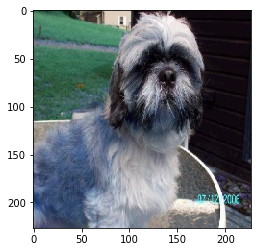

In [7]:
image,label = train_data[0]
plt.imshow(image)


<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [10]:
image = image.reshape(1,227,227,3)

In [11]:
image.shape

(1, 227, 227, 3)

<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [8]:
#load training data
img, labels = [], []
for i in range(len(train_data)):
    img.append(train_data[i][0])
    labels.append(train_data[i][1])
np_img = np.array(img)
np_labels = np.array(labels)

In [9]:
#load testing data
img_test = []
for i in range(len(test_data)):
    img_test.append(test_data[i])

test_img = np.array(img_test)


In [14]:
# split the data
st = 0
ed = 2450
for i in range(10):
    with open('dc_training_' + str(i) + '.pkl', 'wb') as file:
        temp = {'data':np_img[st:ed], 'labels':np_labels[st:ed]}
        pickle.dump(temp, file)
    st += 2450
    ed += 2450

with open('dc_validation' + '.pkl', 'wb') as file:
    temp2 = {'data':np_img[24500:], 'labels':np_labels[24500:]}
    pickle.dump(temp2, file)

si = 0
ei = 2500
for i in range(5):
    with open('dc_test_' + str(i) + '.pkl', 'wb') as file:
        temp3 = test_img[si:ei]
        pickle.dump(temp3, file)
    si += 2500
    ei += 2500

